In [53]:
import numpy as np
import gzip
import pickle
import torch
import matplotlib.pyplot as plt
import h5py

device = torch.device("cuda")
dtype = torch.float
f = gzip.open('../data/mnist.pkl.gz', 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
p = u.load()
train_set, _, _ = p

data_mnist = torch.as_tensor(
    train_set[0][:10000, :].T, device=device, dtype=dtype)
labels_mnist = torch.tensor(np.zeros(len(data_mnist[0])), device=device)


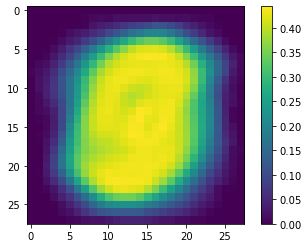

In [13]:
plt.imshow(torch.std(data_mnist, 1).view(28,28).cpu())
plt.colorbar()

In [36]:
STD_MNIST = torch.std(data_mnist, 1)

In [41]:
var_rm = []
for i in range(STD_MNIST.shape[0]):
    if STD_MNIST[i] == 0:
        var_rm.append(i)
var_rm = np.array(var_rm)
newMNIST = torch.zeros(data_mnist.shape[0]-len(var_rm), 10000)
passed=0
for i in range(data_mnist.shape[0]):
    if np.isin(i, var_rm):
        passed+=1
    else:
        newMNIST[i-passed, :] = data_mnist[i,:]

In [35]:
%debug

> <ipython-input-34-c4b434f0b9b3>(3)<module>()
      1 var_rm = []
      2 for i in range(STD_MNIST.shape[0]):
----> 3     if STD_MNIST[i] == 0:
      4         var_rm.append[i]
      5 var_rm = np.array(var_rm)



ipdb>  STD_MNIST


tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 3.9844e-03, 1.0566e-02, 1.3451e-02, 1.0370e-02, 1.9139e-02,
         1.6701e-02, 1.8321e-02, 1.7908e-02, 1.8253e-02, 2.2852e-02, 1.7468e-02,
         1.7922e-02, 1.4001e-02, 1.5649e-02, 9.1707e-03, 7.8165e-03, 7.6953e-03,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.2656e-03, 4.8943e-04,
         1.9922e-03, 4.6006e-03, 2.3193e-02, 3.4172e-02, 4.2449e-02, 5.2788e-02,
         6.8900e-02, 8.0607e-02, 8.9696e-02, 1.0218e-01, 1.1640e-01, 1.132

ipdb>  STD_MNIST[i]


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.], device='cuda:0')


ipdb>  exit


In [43]:
newMNIST.shape

torch.Size([673, 10000])

In [50]:
rebuiltMNIST = torch.zeros(data_mnist.shape, device = device)
passed = 0
for i in range(data_mnist.shape[0]):
    if np.isin(i, var_rm):
        rebuiltMNIST[i, :] = torch.zeros(rebuiltMNIST[i, :].shape)
        passed +=1
    else :
        rebuiltMNIST[i, :] = newMNIST[i-passed, :]

In [51]:
torch.std(rebuiltMNIST, 1) - torch.std(data_mnist, 1)

tensor([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         4.6566e-10,  9.3132e-10, -1.8626e-09,  0.0000e+00,  0.0000e+00,
         1.8626e-09,  1.8626e-09,  1.8626e-09,  0.0000e+00,  1.8626e-09,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  9.3132e-10,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        -2.3283e-10,  0.0000e+00,  2.3283e-10,  0.0000e+00,  0.0000e+00,
        -3.7253e-09,  3.7253e-09,  0.0000e+00,  0.0

In [54]:
fname = "../data/cleanMNIST10000.h5"
f = h5py.File(fname, "w")
f.create_dataset('original', data=data_mnist.cpu())
f.create_dataset('clean', data=newMNIST.cpu())
f.create_dataset('id_col', data=var_rm)
f.close()